<a href="https://colab.research.google.com/github/nyp-sit/aiup/blob/main/day1-pm/video-anomaly-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.nyp.edu.sg/content/dam/nyp/logo.png" width="238" height="70"/>



## Isolation Forest

We first generate some sample data in two clusters (each one containing n_samples) by randomly sampling the standard normal distribution as returned by numpy.random.randn. One of them is spherical and the other one is slightly deformed.

For consistency with the IsolationForest notation, the inliers (i.e. the gaussian clusters) are assigned a ground truth label 1 whereas the outliers (created with numpy.random.uniform) are assigned the label -1.

In [1]:
#import sys
#!{sys.executable} -m pip install scikit-learn==1.1.0
!pip install scikit-learn==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

n_samples, n_outliers = 120, 40
rng = np.random.RandomState(0)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, 2])  # general
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])  # spherical
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

X = np.concatenate([cluster_1, cluster_2, outliers])
y = np.concatenate(
    [np.ones((2 * n_samples), dtype=int), -np.ones((n_outliers), dtype=int)]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

We can visualize the resulting clusters:

In [19]:
import matplotlib.pyplot as plt

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("Gaussian inliers with \nuniformly distributed outliers")
plt.show()

NameError: name 'X' is not defined

Next, we train the Isolation Forest with the default 100 estimators, default contamination and sub-sampling rate of 100.

In [4]:
from sklearn.ensemble import IsolationForest

#clf = IsolationForest(n_estimators=100, max_samples=100, contamination='auto', random_state=0)
clf = IsolationForest(n_estimators=1000, max_samples=100, contamination=0.2, random_state=0)
clf.fit(X_train)

IsolationForest(contamination=0.2, max_samples=100, n_estimators=1000,
                random_state=0)

We use the class DecisionBoundaryDisplay to visualize a discrete decision boundary. The background color represents whether a sample in that given area is predicted to be an outlier or not. The scatter plot displays the true labels.

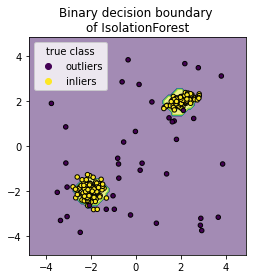

In [5]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.show()

By setting the response_method="decision_function", the background of the DecisionBoundaryDisplay represents the score given by the path length averaged over a forest of random trees.

When a forest of random trees collectively produce short path lengths for isolating some particular samples, they are highly likely to be anomalies and the measure of normality is close to 0. Similarly, large paths correspond to values close to 1 and are more likely to be inliers.

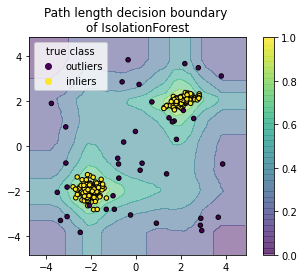

In [6]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

## Exercise
Change the hyperparameters of the isolation forest and observe what happens to the decision boundaries

## Isolation Forest for Credit Card Fraud Detection

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

df=pd.read_csv('creditcard.csv')
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

Examine the data distribution. Most of the data are valid transactions, with only a small percentage of fraud cases

0    284315
1       492
Name: Class, dtype: int64


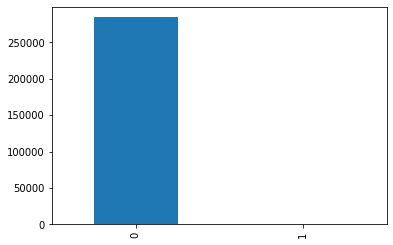

In [5]:
print(df.Class.value_counts())
df.Class.value_counts().plot(kind='bar')

As a first step, we can train the Isolation Forest using only the non-fraudulent class. For validation, we will use data from both fraudulent and non-fraudulent classes

In [6]:
seed = 1337
from sklearn.model_selection import train_test_split
def get_data(df, clean_train=True):
    """
        clean_train=True returns a train sample that only contains clean samples.
        Otherwise, it will return a subset of each class in train and test (10% outlier)
    """
    clean = df[df.Class == 0].copy().reset_index(drop=True)
    fraud = df[df.Class == 1].copy().reset_index(drop=True)
    print(f'Clean Samples: {len(clean)}, Fraud Samples: {len(fraud)}')

    if clean_train:
        train, test_clean = train_test_split(clean, test_size=len(fraud), random_state=seed)
        print(f'Train Samples: {len(train)}')

        test = pd.concat([test_clean, fraud]).reset_index(drop=True)

        print(f'Test Samples: {len(test)}')

        # shuffle the test data
        test.sample(frac=1, random_state=seed).reset_index(drop=True)
        
        train_X, train_y = train.loc[:, ~train.columns.isin(['Class'])], train.loc[:, train.columns.isin(['Class'])]
        test_X, test_y = test.loc[:, ~test.columns.isin(['Class'])], test.loc[:, test.columns.isin(['Class'])]
    else:
        clean_train, clean_test = train_test_split(clean, test_size=int(len(fraud)+(len(fraud)*0.9)), random_state=seed)
        fraud_train, fraud_test = train_test_split(fraud, test_size=int(len(fraud)*0.1), random_state=seed)
        print(len(clean_train))
        print(len(fraud_train))
        
        train_samples = pd.concat([clean_train, fraud_train]).reset_index(drop=True)
        test_samples = pd.concat([clean_test, fraud_test]).reset_index(drop=True)
        
        # shuffle
        train_samples.sample(frac=1, random_state=seed).reset_index(drop=True)
        
        print(f'Train Samples: {len(train_samples)}')
        test_samples.sample(frac=1, random_state=seed).reset_index(drop=True)
        
        print(f'Test Samples: {len(test_samples)}')
        train_X, train_y = train_samples.loc[:, ~train_samples.columns.isin(['Class'])], train_samples.loc[:, train_samples.columns.isin(['Class'])]
        test_X, test_y = test_samples.loc[:, ~test_samples.columns.isin(['Class'])], test_samples.loc[:, test_samples.columns.isin(['Class'])]
    
    return train_X, train_y, test_X, test_y



In [7]:
train_X, train_y, test_X, test_y = get_data(df)

model = IsolationForest(random_state=seed)
#model.fit(train_X, train_y)
model.fit(train_X)

Clean Samples: 284315, Fraud Samples: 492
Train Samples: 283823
Test Samples: 984


IsolationForest(random_state=1337)

We can now make the predictions and print the classification report

In [8]:
from sklearn.metrics import classification_report
def predict(X):
    test_yhat = model.predict(X)
    # values are -1 and 1 (-1 for outliers and 1 for inliers), thus we will map it to 0 (inlier) and 1 (outlier) as this is our target variable
    test_yhat = np.array([1 if y == -1 else 0 for y in test_yhat])
    return test_yhat

test_yhat = predict(test_X)

In [9]:
def get_classification_report(test_y, test_yhat):
    labels = ['Legitimate','Fraudulent']
    print(classification_report(test_y, test_yhat, target_names=labels))
get_classification_report(test_y, test_yhat)

              precision    recall  f1-score   support

  Legitimate       0.86      0.96      0.90       492
  Fraudulent       0.95      0.84      0.89       492

    accuracy                           0.90       984
   macro avg       0.90      0.90      0.90       984
weighted avg       0.90      0.90      0.90       984



As seen in the classification report, the f1-score for fraudulent class is 0.89, which is quite good. Let us see what happens if our training data had both fraudulent and non-fraudeulent data

In [10]:
train_X, train_y, test_X, test_y = get_data(df, clean_train=False)
model = IsolationForest(random_state=seed)
#model.fit(train_X, train_y)
model.fit(train_X)
test_yhat = predict(test_X)

Clean Samples: 284315, Fraud Samples: 492
283381
443
Train Samples: 283824
Test Samples: 983


In [11]:
get_classification_report(test_y, test_yhat)

              precision    recall  f1-score   support

  Legitimate       0.99      0.97      0.98       934
  Fraudulent       0.57      0.80      0.67        49

    accuracy                           0.96       983
   macro avg       0.78      0.88      0.82       983
weighted avg       0.97      0.96      0.96       983



The f1-score for fraudulent cases has dropped to 0.67 although the f1-score for legitimate cases have increased. This indicates that the inclusion of the outliers in the training set has caused the threshold to better identify legitimate points, at the expense of the fraudulent cases.  

## Credit Card Fraud Detection with some Feature Engineering and Explainability

Let us now try a synthetic dataset and add some feature engineering and explainability to the anomaly detection model. The dataset here was generated by a program called PaySim which simulates mobile payments based on “aggregated transactional data” from a real company. Given its confidential nature, it is difficult to obtain publicly available transactional data. The dataset comprises a total of 6,362,620 transactions which occurred over a simulated time span of 30 days.

Based on the code above, read in the file into a pandas dataframe and display the first five rows.

<details><summary>Click here for answer</summary> 
<br/>

```
df=pd.read_csv('financial.csv')
df.head)
```
</details>


In [3]:
# Enter code here

<bound method NDFrame.head of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1  

There is both numerical data, such as the ‘amount’ and ‘oldbalanceOrg’ fields, as well as categorical data, such as the ‘type’ and ‘nameOrig’ fields. These records contain information about the original and the new account balance of each of the two parties involved in the transaction (origin and destination), as well as a separate record of the exact amount (supposed to be) transferred. The ‘step’ field denotes the number of hours passed since the start of the simulation. The ‘isFraud’ column tells us which transactions are indeed fraudulent, whereas the ‘isFlaggedFraud’ column is a simple indicator variable for whether the amount transferred in a given transaction exceeds the threshold of 200,000. This latter field represents the rule based strategy mentioned in the lecture


All numerical features can easily be used as inputs to the model, so the fields ‘amount’, ‘oldbalanceOrg’, ‘newbalanceOrig’, ‘oldbalanceDest’ and ‘newbalanceDest’ will be used as features as they are.

In [8]:
features = pd.DataFrame(index=df.index)
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
features[numerical_columns] = df[numerical_columns]

Since the ‘amount’ field seems to sometimes deviate from the difference between the original and the new balances of one or both of the transaction parties, we decided to include these differences in the data as two additional features: ‘changebalanceOrig’ and ‘changebalanceDest’

In [11]:
features['changebalanceOrig'] = features['newbalanceOrig'] - features['oldbalanceOrg']
features['changebalanceDest'] = features['newbalanceDest'] - features['oldbalanceDest']

Since the ‘step’ field gives us the relative timestamps of all transactions in an hourly resolution, we can derive the (hourly) time of the day when the transaction occurred. To do this we simply transform the ‘step’ field by applying the modulo of 24.

In [14]:
features['hour'] = df['step'] % 24

Finally, we want to make use of the information provided in the ‘type’ column. Since our model will only be able to use numerical data, and since there is no logical ordering of the values that the ‘type’ field can assume, we will proceed by one-hot encoding the field into 5 columns, one for each of the possible values of ‘type’. The binary values in the columns indicate whether the content of ‘type’ is equal to the column’s corresponding value. The matrix of one-hot encodings is then appended to our feature matrix.

In [15]:
type_one_hot = pd.get_dummies(df['type'])
features = pd.concat([features, type_one_hot], axis=1)

We are now ready to use Isolation Forest for anomaly detection. To function as a fraud detection system that is as general as possible, we want the following properties in our model:

- Makes no assumptions about what an anomaly looks like.
- Does not require any flagged data (labels).
- Provides a continuous anomaly score, such that the number of identified anomalies can be adjusted depending on the desired strictness.

Isolation forest fulfills all of the above requirements and relies on two simple assumptions: Anomalies are few, and anomalies are different.

Try to use the code in the previous section to train the Isolation Forest

<details><summary>Click here for answer</summary> 
<br/>

```
from sklearn.ensemble import IsolationForest
forest = IsolationForest(random_state=0)
forest.fit(features)
```
</details>

In [16]:
# Enter code here

IsolationForest(random_state=0)

To get a continous anomaly score for each data point rather than a binary anomaly indicator which would be dependent on an arbitrarily-chosen threshold value, we call the score samples method.

In [17]:
scores = forest.score_samples(features)
print(scores)

[-0.4651006  -0.44123684 -0.50073762 ... -0.70888948 -0.59399972
 -0.65123159]


(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

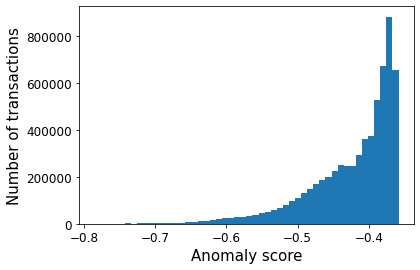

In [20]:
# plot anomaly score distribution
plt.hist(scores, bins=50)
plt.ylabel('Number of transactions', fontsize=15)
plt.xlabel('Anomaly score', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

The raw output of the Isolation Forest is not a split of the dataset into anomalies and non-anomalies, but rather a list of continuous anomaly scores, one for every entry. This means that, depending on how many anomalies we want to detect (how wide we want to cast our net), we can set a different threshold which determines the data points that are considered as anomalies (i.e. data points with scores below the threshold). A lower anomaly score means that there is a higher chance that the data point is an anomaly.

In [23]:
top_n_outliers = 5
top_n_outlier_indices = np.argpartition(scores, top_n_outliers)[:top_n_outliers].tolist()
#top_outlier_entries = df.iloc[top_n_outlier_indices, :]
top_outlier_features = features.iloc[top_n_outlier_indices, :]
top_outlier_features


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,changebalanceOrig,changebalanceDest,hour,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4157895,37387628.10,862621.88,0.0,37843025.59,7.523065e+07,-862621.88,37387628.10,15,0,0,0,0,1
4146715,38874009.46,435622.96,0.0,73634878.73,1.125089e+08,-435622.96,38874009.45,15,0,0,0,0,1
4153782,32572996.87,279467.23,0.0,84947676.90,1.175207e+08,-279467.23,32572996.87,15,0,0,0,0,1
4142016,51141938.17,310058.79,0.0,87081824.45,1.382238e+08,-310058.79,51141938.17,15,0,0,0,0,1
4145988,31866120.39,503019.94,0.0,63539675.65,9.540580e+07,-503019.94,31866120.39,15,0,0,0,0,1


The raw output of the isolation forest is not a split of the dataset into anomalies and non-anomalies, but rather a list of continuous anomaly scores, one for every entry. This means that, depending on how many anomalies we want to detect (how wide we want to cast our net), we can set a different threshold which determines the data points that are considered as anomalies (i.e. data points with scores below the threshold). One way to evaluate the result of our model without choosing one particular threshold is by computing the area under the ROC curve of the model output.

To have a baseline to compare the isolation forest to, we will use a naive method for anomaly detection in this dataset which consists of treating the money amount transfered as the anomaly score, where higher amounts represent a higher chance of being an anomaly. We will take this approach to compute a naive ROC area under the curve.

Finally, we will also add the AUC score that would be obtained by random guessing.

The predicted anomalies are evaluated against the 'isFraud' columns which represents the ground truth value of whether the given entry constitutes an anomaly or not.

In [27]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, roc_auc_score
# evaluate isolation forest anomaly scores
fpr_iforest, tpr_iforest, thresholds_iforest = roc_curve(df['isFraud'], -scores)
auc_score_iforest = roc_auc_score(df['isFraud'], -scores)

# evaluate naive (amount) anomaly scores
fpr_naive, tpr_naive, thresholds_naive = roc_curve(df['isFraud'], df['amount'])
auc_score_naive = roc_auc_score(df['isFraud'], df['amount'])

In [28]:
def plot_roc_curve(fpr, tpr, name, auc_score):
    plt.plot(fpr, tpr, label=name + ', AUC={}'.format(round(auc_score, 3)))

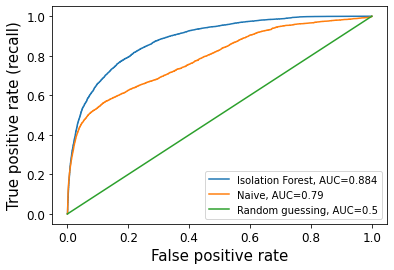

In [29]:
plot_roc_curve(fpr_iforest, tpr_iforest, 'Isolation Forest', auc_score_iforest)
plot_roc_curve(fpr_naive, tpr_naive, 'Naive', auc_score_naive)
plot_roc_curve([0, 1], [0, 1], 'Random guessing', 0.5)
plt.xlabel('False positive rate', fontsize=15)
plt.ylabel('True positive rate (recall)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(prop={'size': 12})
plt.legend()

We will now try to understand how the model generates the output. The explanation model we are going to use is called SHAP. For our purposes, what we need to understand about SHAP is that the explanation values it provides tell us about the effect that the value of a feature of a particular data point had on its associated anomaly score. In other words, if we look at a particular output of our model, SHAP values tell us how much each feature of the input contributed to that score, and in which direction (i.e. whether the feature contributed to a higher or a lower anomaly score).

First, we need to instantiate an appropriate  Explainer  model. Since we are using a tree-based model it makes sense to use SHAP’s  TreeExplainer.

In [31]:
!pip install shap
import shap
explainer = shap.TreeExplainer(forest)

  Using cached shap-0.41.0-cp39-cp39-win_amd64.whl (435 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


Next, we compute the SHAP values for a set of 5000 randomly chosen data points. 

In [32]:
random_indices = np.random.choice(len(features), 5000)
shap_values_random = explainer.shap_values(features.iloc[random_indices, :])
random_features = features.iloc[random_indices, :]

To visualize the explanation values of a single point, we can use the force_plot function. Let’s display the explanation for the first entry in the randomly chosen dataset.

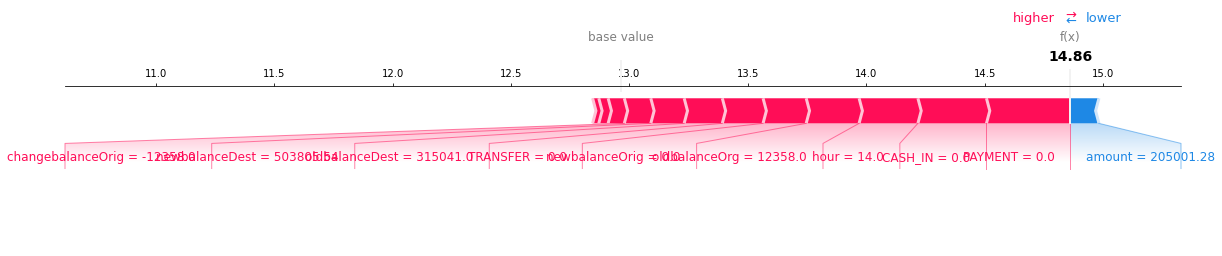

In [48]:
#shap.force_plot(explainer.expected_value, shap_values_random[0, :], random_features.iloc[0, :],show=False,matplotlib=True).savefig('scratch.png')

In [65]:
from IPython.core.display import display, HTML
shap.initjs
dis=shap.force_plot(explainer.expected_value, shap_values_random[0, :], random_features.iloc[0, :],matplotlib=False)
shap_html = f"{shap.getjs()}{dis.html()}"
#display(HTML(shap_html))
with open("orig_shap.html", "w", encoding='utf8') as file:
    file.write(shap_html)
#display(HTML(shap_html))

The ‘base value’ in the above plot corresponds to the average output of the model over the training set, whereas f(x) value in bold indicates the model output for this specific datapoint. The purpose of this plot is to show how the individual features of this data point contributed to shifting the model output from its expected (base) value, to the actual value. The values of these individual contributions are SHAP values. Blue bars represent SHAP values that are negative and contributed to a lower anomaly score (making it more likely for that data point to be an anomaly), whereas red bars represent positive SHAP values making the output higher (i.e. suggesting that this data point is normal). The sum of all SHAP values is equal to the difference between base value and model output value. Note that the SHAP explainer works with raw anomaly scores, whereas on the histogram earlier we were looking at normalized values. The meaning stays the same: a lower score implies higher chance of being an anomaly.

In the above example we can see that, while a couple of features were suggestive of this data point being anomalous, such as the amount field (presumably because it is a rather high amount), most of the features indicate that this data point is rather normal.

One issue with the previous plot is the fact that the different values of the ‘type’ field are treated as separate features with binary values due to the one-hot-encoding we applied in the beginning. To solve this, we can simply undo the one-hot-encoding in the feature matrix and add all of the corresponding SHAP values to a single value. 

In [68]:
def condense(features, shap_values, indices):
    features_condensed = features.drop(columns=['CASH_IN', 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT'])
    features_condensed['type'] = df['type']
    selected_features_condensed = features_condensed.iloc[indices, :]
    
    shap_values_without_type = shap_values[:, :-5]
    shap_values_type_sum = shap_values[:, -5:].sum(axis=1).reshape(-1, 1)

    shap_values_condensed = np.concatenate([shap_values_without_type, shap_values_type_sum], axis=1)

    return selected_features_condensed, shap_values_condensed

In [70]:
random_features_condensed, shap_values_random_condensed = condense(features, shap_values_random, random_indices)
#top_outlier_features_condensed, top_shap_values_condensed = condense(features, top_shap_values, top_n_outlier_indices)

We can generate and examine the new plot.

In [71]:
from IPython.core.display import display, HTML
shap.initjs
dis=shap.force_plot(explainer.expected_value, shap_values_random_condensed[0, :], random_features_condensed.iloc[0, :],matplotlib=False)
shap_html = f"{shap.getjs()}{dis.html()}"
#display(HTML(shap_html))
with open("condensed_shap.html", "w", encoding='utf8') as file:
    file.write(shap_html)
#display(HTML(shap_html))

Even though SHAP values are local explanations, i.e. they explain the contributions of features on single data points, we can gain more general insights about the decision our model makes by aggregating many of these local explanations to discover global trends. Let us first take a look at a summary of the SHAP value for the features


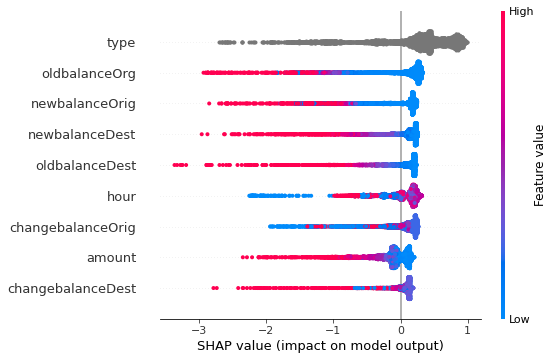

In [76]:
shap.summary_plot(shap_values_random_condensed, random_features_condensed)

One useful tool that the SHAP library provides to gain such insights is the dependence_plot function. It shows us how, across many data points, a SHAP value of a specific feature (y-axis) depends on the feature’s value (x-axis). Dots in the plot represent individual data points.

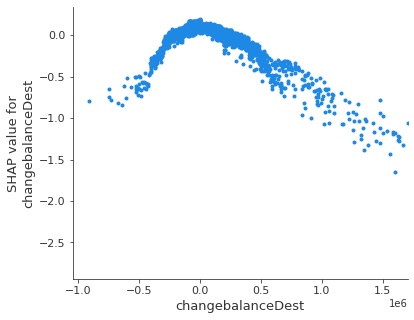

In [72]:
shap.dependence_plot(
 'changebalanceDest',
 shap_values_random,
 random_features,
 interaction_index=None,
 xmax='percentile(99)'
)

We can see that the SHAP value of ‘changebalanceDest’ is small for values close to zero, suggesting small changes in the receiver account’s balance are common. The more the absolute value increases, the more the SHAP value contributes to making the anomaly score lower (i.e. increasing the chance of being an anomaly). We can see that the most significant SHAP values are in the realm of very large positive numbers.

The dependence_plot also allows us to take into consideration the effect of another feature with the interaction_index argument.

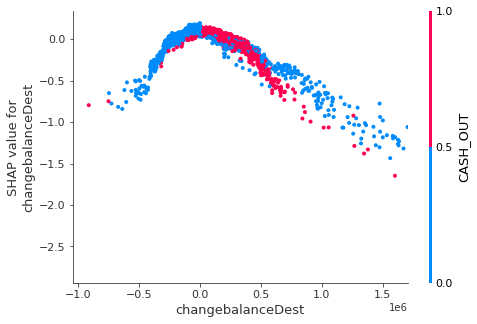

In [73]:
shap.dependence_plot(
 'changebalanceDest',
 shap_values_random,
 random_features,
 interaction_index='CASH_OUT',
 xmax='percentile(99)'
)

This plot shows that, whether the ‘type’ field of a data point is equal to CASH_OUT or not also correlates with how the SHAP value for ‘changebalanceDest’ behaves. It seems as though large sums of money become indicators for an anomaly more quickly if the ‘type’ field is equal to CASH_OUT.

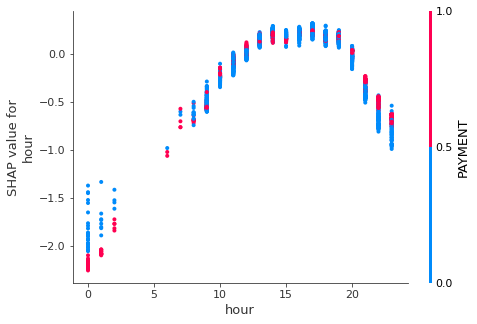

In [75]:
shap.dependence_plot(
 'hour',
 shap_values_random,
 random_features,
 interaction_index='PAYMENT',
 xmax='percentile(99)'
)

We can also detect an interesting interaction between the SHAP value of the ‘hour’ feature and whether the ‘type’ feature is equal to PAYMENT.
While a ‘hour’ value between 0 and 5 is generally indicative of being an anomaly, this effect is more pronounced for transactions of the PAYMENT type. Interestingly, this effect is not there or even reversed during other times of the day.


## DBSCAN

Let us now use DBSCAN for anomaly detection. Recall that DBSCAN is a density based clustering approach that clusters data points based on continuous regions of high point density and determines the ideal number of clusters to be formed. In contrast to k-means, not all points are assigned to a cluster, and we are not required to declare the number of clusters (k). However, the two key parameters in DBSCAN are min_samples (to set the minimum number of data points required to determine a core point) and eps (max allowed distance between two points to put them in the same cluster).

Lets first try a toy example

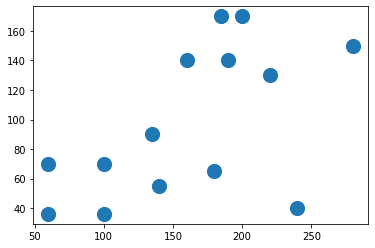

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import DBSCAN

X_train = np.array([[60,36], [100,36], [100,70], [60,70],
    [140,55], [135,90], [180,65], [240,40],
    [160,140], [190,140], [220,130], [280,150], 
    [200,170], [185, 170]])
plt.scatter(X_train[:,0], X_train[:,1], s=200)
plt.show()


We now use DBSCAN with eps=45 and min_samples=4 to perform anomaly detection. There are 6 core points found by the algorithm, 2 clusters and a couple of outliers (noise points).

In [ ]:
eps = 45
min_samples = 4
db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_train)
labels = db.labels_
print(labels)

print(db.core_sample_indices_)

[ 0  0  0  0  0  0  0 -1  1  1  1 -1  1  1]
[ 1  2  4  9 12 13]


We can visualize the clusters as below. Points in cluster 0 are colored red, points in cluster 1 are colored green, outlier points are colored black and core points are marked with '*'s. Two points are connected by an edge if they are within the epsilon neighbourhood.

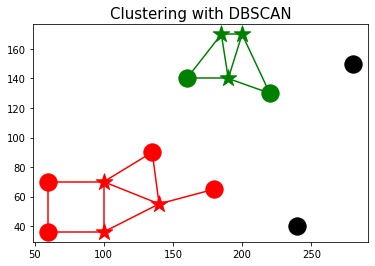

In [ ]:
def dist(a, b):
    return np.sqrt(np.sum((a - b)**2))

colors = ['r', 'g', 'b', 'k']
for i in range(len(X_train)):
    plt.scatter(X_train[i,0], X_train[i,1], 
                s=300, color=colors[labels[i]], 
                marker=('*' if i in db.core_sample_indices_ else 'o'))
                                                            
    for j in range(i+1, len(X_train)):
        if dist(X_train[i], X_train[j])  < eps:
            plt.plot([X_train[i,0], X_train[j,0]], [X_train[i,1], X_train[j,1]], '-', color=colors[labels[i]])
            
plt.title('Clustering with DBSCAN', size=15)
plt.show()

## DBSCAN on credit card fraud dataset

We first scale and normalize the train_X data from above.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [ ]:
scaler=StandardScaler().fit(train_X)
X_s = scaler.transform(train_X)
X_norm = pd.DataFrame(normalize(X_s))
X_norm.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.047923,-0.199858,-0.228628,0.020562,0.081671,0.199833,-0.148977,-0.232185,-0.159425,0.076901,...,-0.191547,-0.111462,-0.061123,-0.700008,0.093624,-0.112596,0.050545,0.343165,-0.132209,0.197213
1,0.125601,-0.012983,0.128775,0.161845,0.341916,0.114844,-0.014012,0.292576,-0.156117,-0.149150,...,-0.012650,-0.065504,-0.054826,0.013181,0.101599,-0.368021,-0.192784,-0.322410,-0.330967,-0.009318
2,0.297626,0.279410,0.007380,-0.394449,0.194308,0.240171,0.028446,0.129578,-0.039654,-0.030007,...,-0.032411,0.028282,0.113713,-0.061856,-0.084128,0.304277,-0.284711,-0.020196,-0.054116,-0.035148
3,-0.077527,0.052178,-0.172499,0.145528,0.030675,-0.164455,0.245195,-0.178383,0.091680,0.033375,...,-0.037658,-0.027016,0.028447,0.005331,-0.156770,-0.073167,0.224433,0.035282,0.029158,0.092937
4,-0.105592,0.200896,0.049005,0.031906,0.079263,0.048255,-0.003711,0.010641,-0.020050,-0.020782,...,-0.009898,-0.113932,-0.293155,0.024123,-0.376486,0.174320,0.110099,-0.004743,0.008913,-0.106792


We will fit the DBSCAN model using eps 0.65 and min_samples as 5. “labels” is a vector of the same length as the number of training samples. It contains the class index for each sample, indicating the class it was assigned to. Recall that anomalies have ‘-1’ as their class index.

In [ ]:
db_model = DBSCAN (eps=0.65, min_samples=5).fit(X_norm)
labels=db_model.labels_
np.unique(labels)

array([-1,  0])

We can visualize a logarithmic histogram of the labels, and count the number of outliers identified

<function matplotlib.pyplot.show(*args, **kw)>

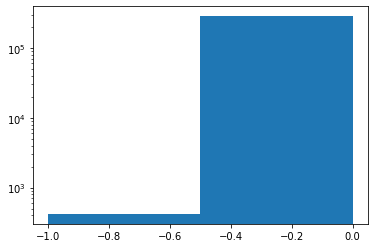

In [ ]:
import matplotlib.pyplot as plt
plt.hist(labels, bins=len(np.unique(labels)),log=True)
plt.show

In [ ]:
n_clusters=len(np.unique(labels))-1
anomaly=list(labels).count(-1)
print(f'Clusters: {n_clusters}')
print(f'Abnormal points: {anomaly}')

Clusters: 1
Abnormal points: 421


Let us check the accuracy of DBSCAN on the training set

In [ ]:
labels2=np.array([1 if y == -1 else 0 for y in labels])
def get_classification_report(test_y, test_yhat):
    label_name = ['Legitimate','Fraudulent']
    print(classification_report(test_y, test_yhat, target_names=label_name))
get_classification_report(train_y, labels2)

              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00    283381
  Fraudulent       0.01      0.01      0.01       443

    accuracy                           1.00    283824
   macro avg       0.50      0.50      0.50    283824
weighted avg       1.00      1.00      1.00    283824



The accuracy of DBSCAN doesn't seem good with the current parameters. Isolation Forest has a better performance. The anomalies detected by DBSCAN from this dataset are not the actual anomalies.

## Exercise

Try adjusting some of the parameters of DBSCAN and observe what happens

## Pycaret
Pycaret is an Automated Machine Learning (AutoML) tool that can be used for both supervised and unsupervised learning. It contains many anomaly detection models.

In [ ]:
!pip install pycaret==2.3.5
!pip install scipy==1.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We will be performing anomaly detection on the Wisconsin Breast Cancer (Diagnostic) dataset from UCI Machine Learning Repository which contains features computed digitized image of a fine needle aspirate of a breast mass and the diagnosis if the mass is benign (B) or malignant (M). This dataset commonly used for demonstrating supervised machine learning where a model is trained to predict the diagnosis. For the purpose of demonstrating unsupervised anomaly detection, we will ignore the diagnosis. We first split the data into the training set and reserve a small “unseen” set for scoring.

In [ ]:
from pycaret.anomaly import *
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True)['data']
df_train = df.iloc[:-10]
df_unseen = df.tail(10)

df_unseen.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.48,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873


Next, we will setup Pycaret to use the dataset. To use Pycaret, we will need to first call the setup function as below. Setting the silent parameter to True automatically confirms the input of data types when setup is executed. If silent is set to False, Pycaret requires the user to do manual confirmation of the input data types as shown in the image below.

In [ ]:
anom = setup(data = df_train, 
             silent = True)

,Description,Value
0,session_id,1594
1,Original Data,"(559, 30)"
2,Missing Values,False
3,Numeric Features,30
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(559, 30)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

We can check the anomaly detection models available in Pycaret. The reference column indicates which source package the model was built from. 

In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


Next, we will train an anomaly detection model. Let's load the iforest model that we have seen previously, with fraction parameter = 0.05. The fraction parameter is the contamination parameter that we have seen previously and indicates the amount of outliers present in the dataset. It has a default value of 0.05

In [ ]:
anom_model = create_model(model = 'iforest', fraction = 0.05)

INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=1594, verbose=0)
INFO:logs:create_model() succesfully completed......................................


We can now train the model using the *assign_model* function. This scores the training dataset using the trained model and returns the prediction of the model, concatenated with the training data. The Anomaly column is binary where 1 indicates that the record is anomalous and 0 indicates that it is normal. The Anomaly_Score column gives the raw score for the record, where negative indicates that the record is normal.

In [ ]:
results = assign_model(anom_model)

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=1594, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:(559, 32)
INFO:logs:assign_model() succesfully completed......................................


In [ ]:
print(results)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
554       12.880         28.92           82.50      514.3          0.08123   
555       10.290         27.61           65.67      321.4          0.09030   
556       10.160         19.59           64.73      311.7          0.10030   
557        9.423         27.88           59.26      271.3          0.08123   
558       14.590         22.68           96.39      657.1          0.08473   

     mean compactness  mean concavity  mean concave points  mea

We can visualize the high dimensional results in lower dimensions using data visualization non-linear graph based methods such as t-SNE or UMAP

In [ ]:
plot_model(anom_model, plot = 'tsne')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(anom_model, plot = 'umap')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


Finally, we can save the model, load the saved model and use it to make predictions 

In [ ]:
save_model(model = anom_model, model_name = 'iforest_model')
loaded_model = load_model('iforest_model')
loaded_model.predict(df_unseen)

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=1594, verbose=0), model_name=iforest_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_tra

Transformation Pipeline and Model Successfully Saved


INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=iforest_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

We can look also look at the probabilities, as well as the anomaly scores using the following functions respectively.

In [ ]:
loaded_model.predict_proba(df_unseen)

array([[0.77383401, 0.22616599],
       [0.89916207, 0.10083793],
       [0.47670737, 0.52329263],
       [0.47385537, 0.52614463],
       [0.53946081, 0.46053919],
       [0.50067118, 0.49932882],
       [0.68264866, 0.31735134],
       [0.85376346, 0.14623654],
       [0.30544885, 0.69455115],
       [0.69041753, 0.30958247]])

In [ ]:
loaded_model.decision_function(df_unseen)

array([-0.10612619, -0.14954957, -0.00317845, -0.00219029, -0.02492111,
       -0.01148137, -0.0745325 , -0.13381996,  0.0561588 , -0.07722425])

However, the results are not very accurate with the default fraction value

In [ ]:
df2=load_breast_cancer(as_frame=True)['target']
df2_unseen = df2.tail(10)
print(df2_unseen)

559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: target, dtype: int64


## Exercise

1. Try changing the fraction/contamination value and see if the prediction accuracy increases. Discuss why or why not.
2. Try using the pycaret package on the credit card fraud dataset and vice versa